In [1]:
from factor_tools import create_analysis_data, create_extended_analysis_data
from factor_analysis_tools import USQuantileFactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

In [8]:
# Analysis parameters
ANALYSIS_PARAMS = {
    'start_date': '2015-01-02',
    'end_date': '2020-12-30',
    'factor_name': ['roe_neutral'],
    'group_num': 10,
    'rebalance_freq': '1m',
    'ic_periods': 20
}

factor_data_path = 'factor_data'

In [9]:
# Create analysis data
data_df_dic, trading_dates = create_analysis_data(
    ANALYSIS_PARAMS['start_date'],
    ANALYSIS_PARAMS['end_date'],
    ANALYSIS_PARAMS['factor_name'],
    'wrds_data.db',
    factor_data_path,

)


Processing dates: 100%|██████████| 1511/1511 [00:14<00:00, 102.71it/s]


In [10]:
# Initialize and run analysis
factor_analysis = USQuantileFactorAnalysis(
    data_df_dic=data_df_dic,
    factor_list=ANALYSIS_PARAMS['factor_name'],
    universe='all',
    group_num=ANALYSIS_PARAMS['group_num'],
    trading_date=trading_dates,
    rebalance_freq=ANALYSIS_PARAMS['rebalance_freq'],
    balance_day= 31,
    ic_periods=ANALYSIS_PARAMS['ic_periods'],
    factor_ascending=False,
    min_price=2.0, market_cap_percentile=0.6
)


In [11]:
# Run analysis
factor_analysis.backtest()

Processing dates: 100%|██████████| 1510/1510 [00:22<00:00, 67.15it/s]


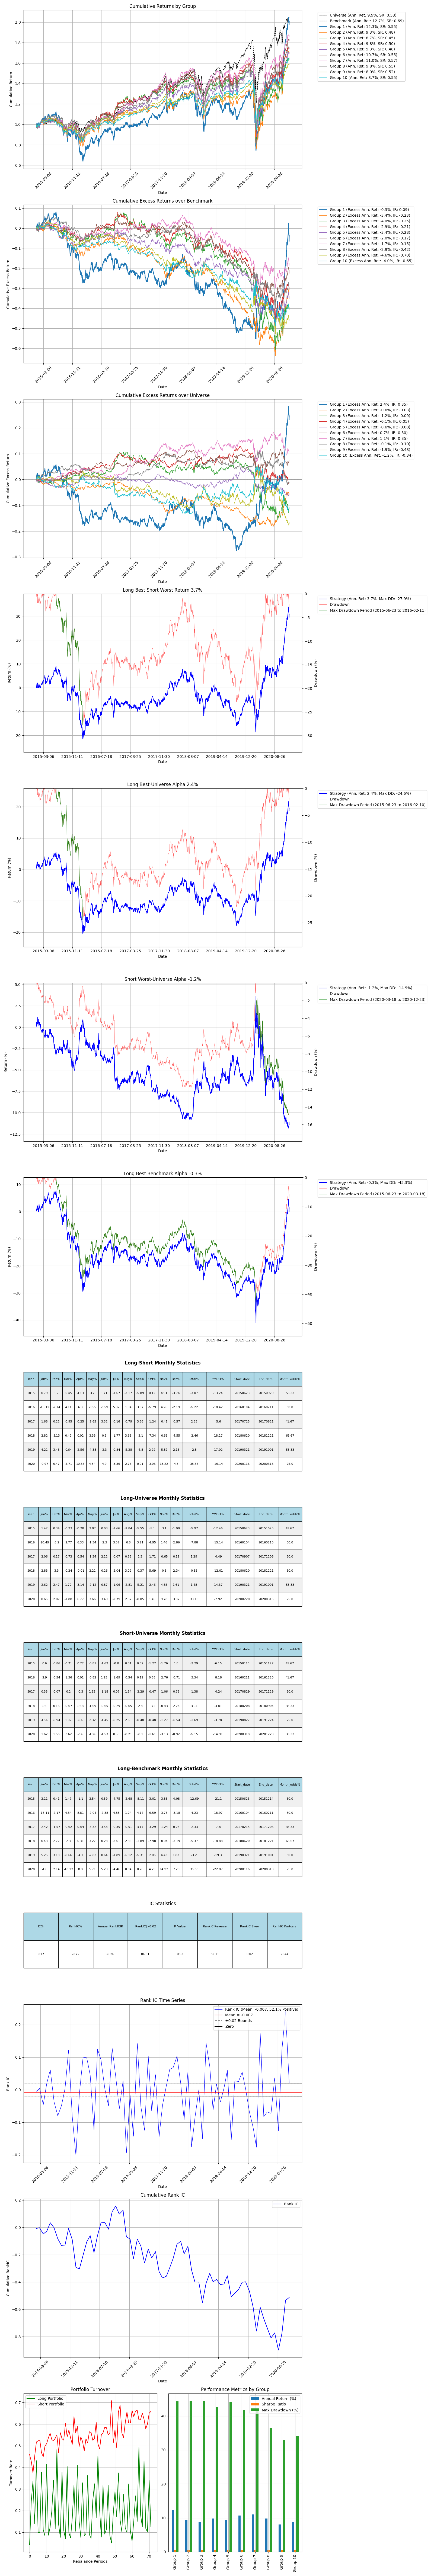

In [12]:
fig = factor_analysis.plot_performance_summary(interactive=True)
plt.show()

In [7]:
factor_analysis.save_performance_summary_pdfs(output_dir='my_performance_plots', dpi=2400)


PDF files have been saved to my_performance_plots/
